In [12]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import lz4.frame
from io import BytesIO
import os
from skimage.transform import resize

In [3]:
def load_from_lz4(path):
    with lz4.frame.open(path, 'rb') as f:
        decompressed_data = f.read()
    decompressed_file = BytesIO(decompressed_data)
    data = np.load(decompressed_file)
    return data

In [8]:
def normalise_intensity(img, lower=1, upper=99):
    lower_bound, upper_bound = np.percentile(img, (lower,upper))
    clipped_img = np.clip(img, lower_bound, upper_bound)
    normalised_img = (clipped_img - lower_bound) / (upper_bound - lower_bound)
    return normalised_img

In [5]:
data_dir = '/cim/data/adni_class_pred_1x1x1_v1/ADNI'

In [ ]:
subject_list = sorted(os.listdir(data_dir))

In [ ]:
for subject in subject_list:
    assert os.path.isdir(os.path.join(data_dir, subject))
    brain_path = os.path.join(data_dir, subject, 't1p.npy.lz4')
    mask_path = os.path.join(data_dir, subject, 'brainmask.npy.lz4')
    
    brain_data = load_from_lz4(brain_path)
    mask_data = load_from_lz4(mask_path)

    assert(brain_data.shape == mask_data.shape == (176, 224, 176))
    # print(np.sum(mask_data))

1931754
1811904
1977548
1864978
1907871
1854406
2050069
2004563
1710422
1965412
1982920
1913989
1782801
2013291
1818838
2060764
1782440
1867180
1879203
1966798
1916555
1834739
1914162
1863505
1808453
1801515
1872666
1966251
1872946
1930881
2028376
1887147
1917342
1917446
1910126
1643276
1771152
1870571
2018730
1915955
1826461
1697546
2211693
1856330
1921429
1762654
1905343
1872460
1859806
1860181
1963754
1852841
1957118
1943425
2095599
2031371
1855773
1991910
1992657
2168651
1853510
1898097
1882504
1915231
1846361
1851309
1937202
1712066
1907769
1933989
2055644
1894683
1918256
1964643
1924666
1732259
1754998
2129294
1910305
1851854
1892183
1873309
1897198
1860050
1993042
1705537
1826711
1636131
1603625
1721938
1813444
1843237
1819372
1869539
1943307
1764617
1919230
1985005
1804438
2006577
2065773
1709726
1880860
2021600
1902600
1859407
1893640
1882298
1801942
1888343
1871532
1935120
1857310
1850217
1971975
2177057
1961200
1981136
1965752
1890120
1948548
1882434
1967687
1971934
1754330


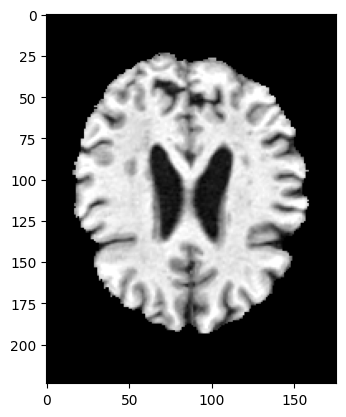

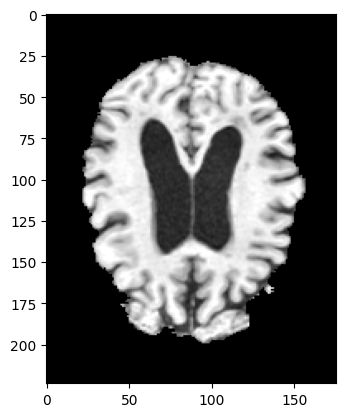

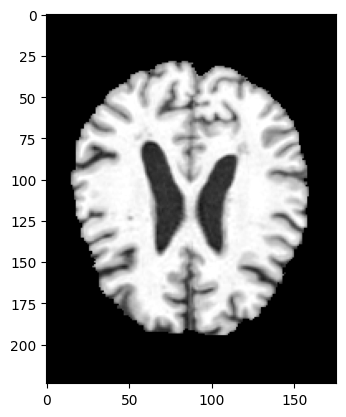

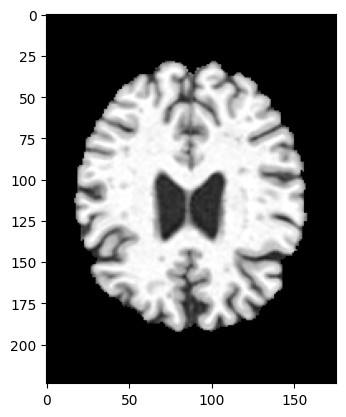

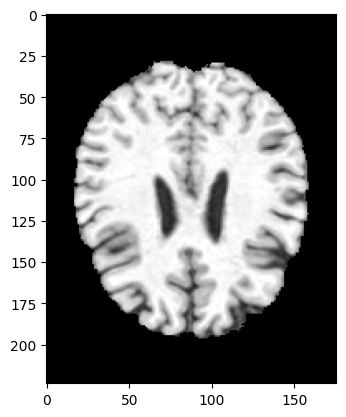

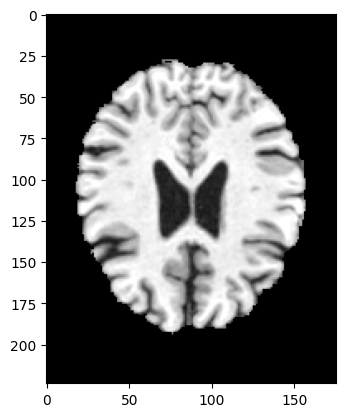

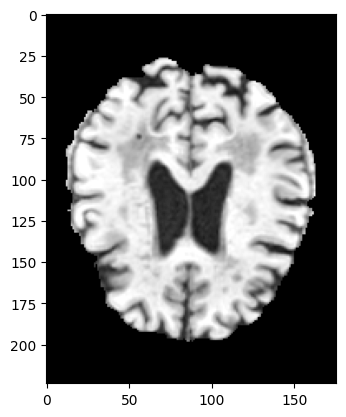

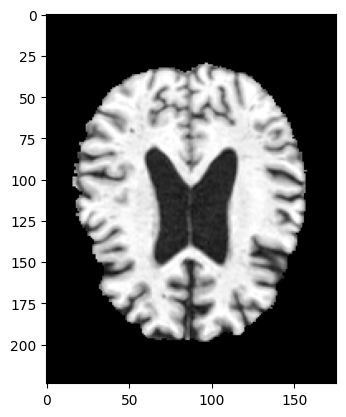

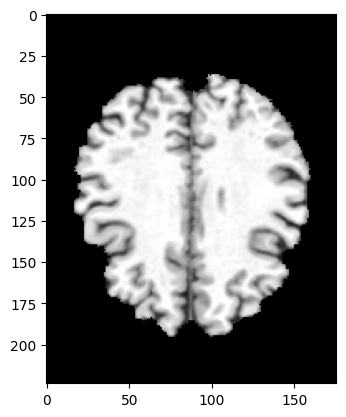

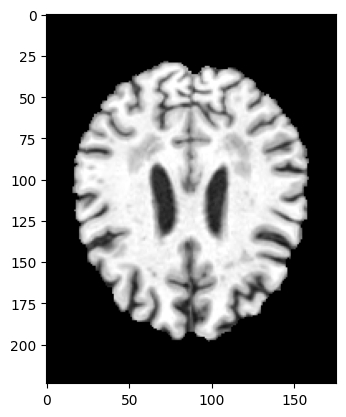

In [9]:
i = 0
for subject in subject_list:
    assert os.path.isdir(os.path.join(data_dir, subject))
    brain_path = os.path.join(data_dir, subject, 't1p.npy.lz4')
    mask_path = os.path.join(data_dir, subject, 'brainmask.npy.lz4')
    
    brain_data = load_from_lz4(brain_path)
    mask_data = load_from_lz4(mask_path)

    assert(brain_data.shape == mask_data.shape == (176, 224, 176))

    masked_brain_data = mask_data * brain_data
    normalised_brain_data = normalise_intensity(masked_brain_data)
    
    if i < 10:
        plt.imshow(normalised_brain_data[100,], cmap='gray')
        plt.show()
        i += 1

## Testing resizing

In [16]:
# Resize the MRI data


resized_mri = resize(normalised_brain_data, (128, 128, 128), order=3, mode='constant', anti_aliasing=True)

print(f"Original shape: {normalised_brain_data.shape}")
print(f"Resized shape: {resized_mri.shape}")

Original shape: (176, 224, 176)
Resized shape: (128, 128, 128)


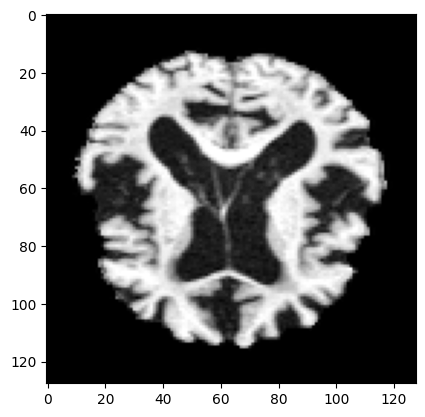

In [22]:
plt.imshow(resized_mri[64,:,:], cmap='gray')